Model loaded successfully!
Found 17572 images belonging to 38 classes.
550/550 ━━━━━━━━━━━━━━━━━━━━ 63s 114ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       504
           1       0.91      0.98      0.94       497
           2       0.97      0.96      0.97       440
           3       0.88      0.85      0.87       502
           4       0.92      0.94      0.93       454
           5       0.97      0.98      0.98       421
           6       0.94      0.92      0.93       456
           7       0.93      0.88      0.90       410
           8       0.99      0.99      0.99       477
           9       0.90      0.96      0.93       477
          10       1.00      1.00      1.00       465
          11       0.96      0.96      0.96       472
          12       0.97      0.97      0.97       480
          13       1.00      0.97      0.98       430
          14       0.97      0.95      0.96       4

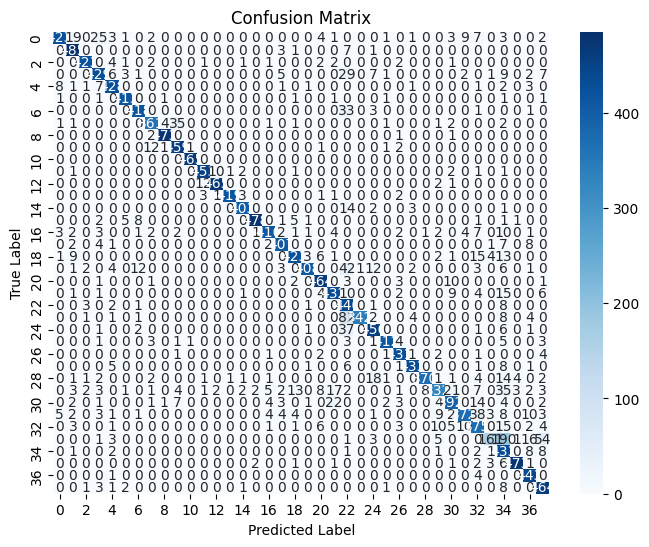

In [4]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/Users/samenergy/Documents/Projects/PlantDiseaseDetectionApp/models/plant_disease_model.keras')
print("Model loaded successfully!")

# Define image parameters (adjust based on your model's input size)
IMG_HEIGHT = 128  # Replace with your model's expected height
IMG_WIDTH = 128   # Replace with your model's expected width
BATCH_SIZE = 32   # Adjust as needed

# Load and preprocess validation data from directory
valid_dir = '/Users/samenergy/Documents/Projects/PlantDiseaseDetectionApp/Data/valid'

# Create an ImageDataGenerator for loading validation data
datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

# Flow data from directory
valid_generator = datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Use 'binary' if it's a binary classification
    shuffle=False  # Keep order for evaluation
)

# Get the true labels from the generator
y_test = valid_generator.classes  # True labels (integer-encoded)

# Make predictions
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()